In [108]:
#Nome: Douglas Hiromi Nishiama
#Nome: Renato Borges Gallo Junior
#Curso: Bando de dados 6º semestre 12/2020

#Analise dos bens acumulados de candidatos ao cargo de vereador de São José dos Campos nas eleiçoes de 2020
#Fonte de dados: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [109]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [110]:
df = pd.read_csv('consulta_cand_2020_SP.csv',encoding='latin-1',sep=';')

In [111]:
df2 = pd.read_csv('bem_candidato_2020_SP.csv',encoding='latin-1',sep=';')

In [ ]:
#Numero de candidatos disputando as eleições em SJC no ano de 2020.

In [112]:
candidatosSJC = 0
candidatos = df[(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')].value_counts()

for row in candidatos:
  candidatosSJC = candidatosSJC + 1;
print ("Numero de candidatos disputando as eleições em SJC: ",candidatosSJC)

Numero de candidatos disputando as eleições em SJC:  618


In [ ]:
#Numero de candidatos disputando aos cargos de Prefeito, Vice-prefeito e vereador as eleições em SJC no ano de 2020 respecitvamente.

In [113]:
vereadoressjc = 0
prefeitosjc = 0
vicesjc = 0

vereadores = df[(df['CD_CARGO']==13)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')].value_counts()

for row in vereadores:
  vereadoressjc = vereadoressjc + 1;

vice = df[(df['CD_CARGO']==12)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')].value_counts()
for row in vice:
  vicesjc = vicesjc + 1;

prefeito = df[(df['CD_CARGO']==11)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')].value_counts()
for row in prefeito:
  prefeitosjc = prefeitosjc + 1;

print ("Eleições 2020 - São José dos Campos\n")
print ("Numero de candidatos ao cargo de prefeito: ",prefeitosjc)
print ("Numero de candidatos ao cargo de vice-prefeito: ",vicesjc)
print ("Numero de candidatos ao cargo de vereador: ",vereadoressjc)
print ("Total de candidatos: ",prefeitosjc + vicesjc + vereadoressjc)

Eleições 2020 - São José dos Campos

Numero de candidatos ao cargo de prefeito:  11
Numero de candidatos ao cargo de vice-prefeito:  11
Numero de candidatos ao cargo de vereador:  596
Total de candidatos:  618


In [114]:
#Numero de candidatos por partido

<AxesSubplot:ylabel='SG_PARTIDO'>

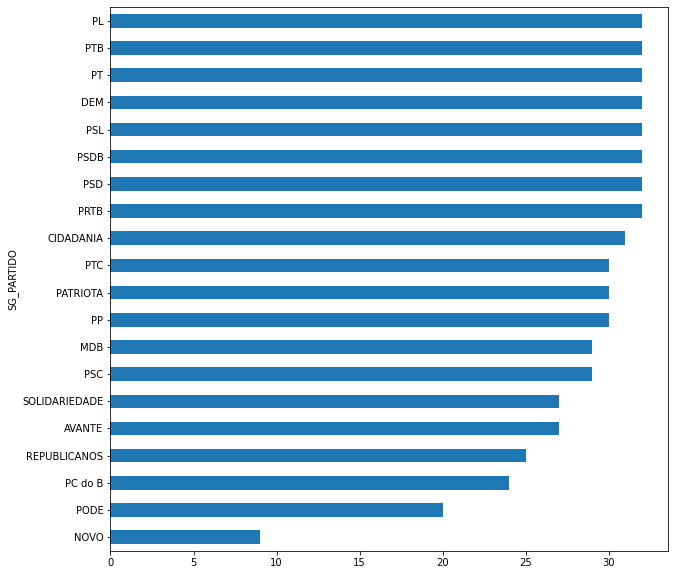

In [115]:
vereadores.groupby('SG_PARTIDO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [116]:
vereadores = df[(df['CD_CARGO']==13)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')]
vereadores = vereadores[['SQ_CANDIDATO','NM_CANDIDATO']].drop_duplicates()

In [117]:
bens2020 = pd.merge(df2, vereadores[['SQ_CANDIDATO','NM_CANDIDATO']], on='SQ_CANDIDATO')

In [118]:
bens2020 = bens2020[['ANO_ELEICAO','SQ_CANDIDATO','NM_CANDIDATO','VR_BEM_CANDIDATO']]

In [119]:
bens2020['VR_BEM_CANDIDATO']= bens2020['VR_BEM_CANDIDATO'].str.replace(',', '.').astype('float64')

In [120]:
# Selecionado de modo descendente pelo valor acumulado dos bens #para obter os candidatos com maior valor de bens.

In [121]:
final = bens2020.groupby(['SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False)

In [122]:
final.head(50)

SQ_CANDIDATO  NM_CANDIDATO                               
250000693869  ENSO ROBERTO GURATTI MORAIS                    6275000.00
250000647382  ALEXANDRE BAULÉ                                3209201.66
250000693456  JOSÉ CLAUDIO MANCILHA DE FARIA BARBOSA         2718419.58
250001016677  PAULO EDUARDO DE MENEZES                       2690000.00
250000693453  JOSE MANCILHA PINTO                            2595050.00
250001044545  LINO BISPO DA ROCHA                            2519000.00
250000693852  ROBERTO KENJI ISHII                            2480006.68
250001044561  PAM WEN LUNG                                   2364079.60
250000637939  SAMUEL GOMES DA SILVA                          2002000.00
250000637935  DANIEL BRAGA SHOJI                             1789199.04
250000637937  DÁRCIO AGUILAR VIEIRA ALVES                    1643434.49
250001158107  ADRIANO RIBEIRO FILHO                          1600000.00
250000681771  JOSE RENATO PENELUPPI                          1565900.00
250000

<AxesSubplot:ylabel='SQ_CANDIDATO,NM_CANDIDATO'>

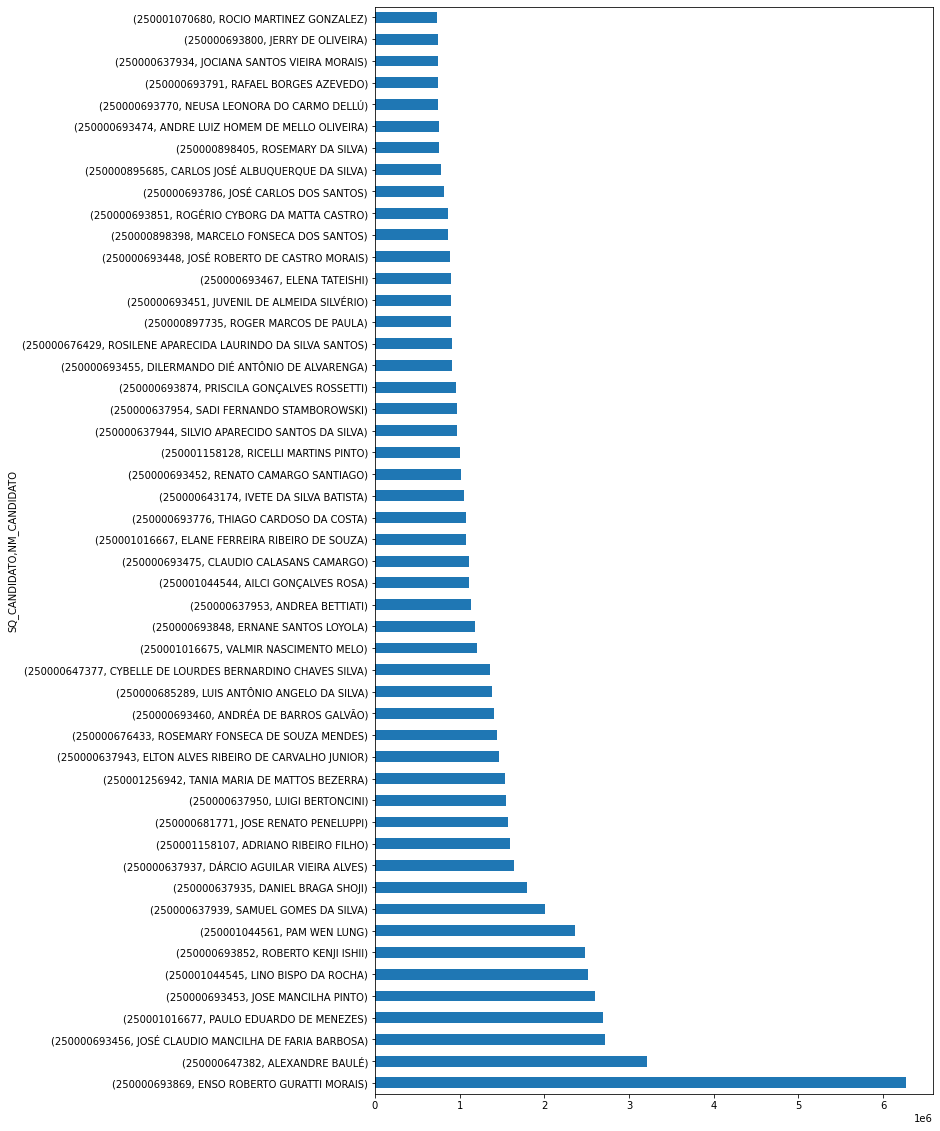

In [123]:
final.head(50).plot(kind='barh', figsize=(10,20))